In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC

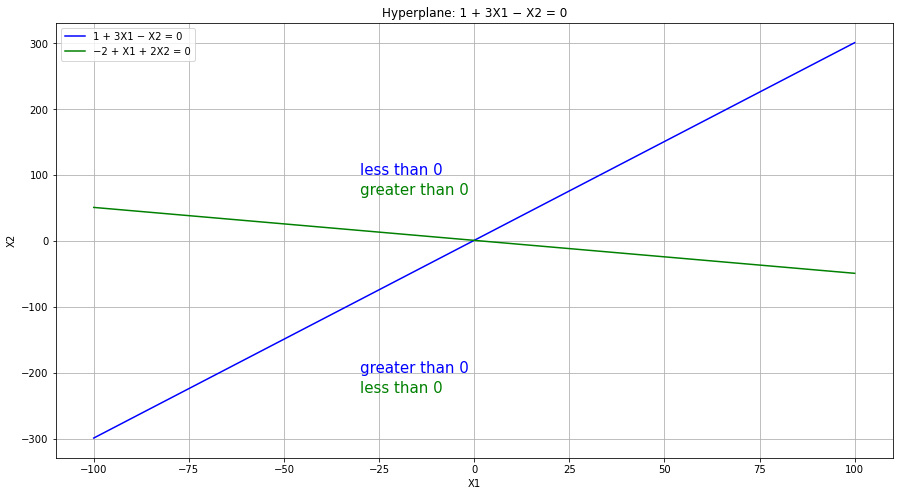

In [4]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
x = np.linspace(-100,100,10000)
plt.plot(x, (1+3*x), color='b', label="1 + 3X1 − X2 = 0")
plt.text(-30, 100, "less than 0", fontdict={'color':'b', 'size':15})
plt.text(-30, -200, "greater than 0", fontdict={'color':'b', 'size':15})

plt.plot(x, (2-x)/2, color='g', label="−2 + X1 + 2X2 = 0")
plt.text(-30, 70, "greater than 0", fontdict={'color':'g', 'size':15})
plt.text(-30, -230, "less than 0", fontdict={'color':'g', 'size':15})

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Hyperplane: 1 + 3X1 − X2 = 0')

plt.grid()
plt.legend()
plt.show()


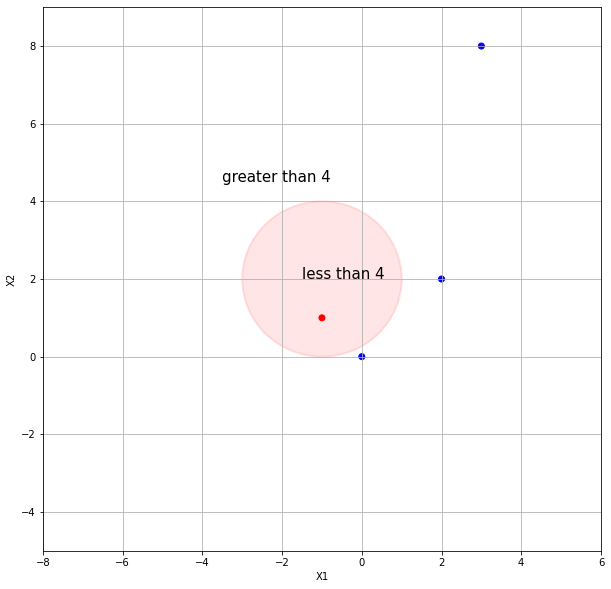

In [5]:
circle = plt.Circle((-1, 2), radius=2, facecolor='r', alpha=0.1, edgecolor='r', linewidth=2.0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.add_artist(circle)
plt.text(-1.5, 2, "less than 4", fontdict={'color':'black', 'size':15})
plt.text(-3.5, 4.5, "greater than 4", fontdict={'color':'black', 'size':15})
plt.scatter([0, -1, 2, 3], [0, 1, 2, 8], c=['b', 'r', 'b', 'b'])

ax.set_xlim(-8, 6)
ax.set_ylim(-5, 9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

In [13]:
from sklearn import svm
X = [[3, 2, 4, 1, 2, 4, 4], [4, 2, 4, 4, 1, 3, 1]]
Y = ['r', 'r', 'r', 'r', 'b', 'b', 'b']
#X = [[3, 2,2, 4, 1, 2, 4, 4], [4, 2,3, 4, 4, 1, 3, 1]]
#Y = ['r', 'r','b', 'r', 'r', 'b', 'b', 'b']

# fit the model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(np.array(X).T.tolist(), Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

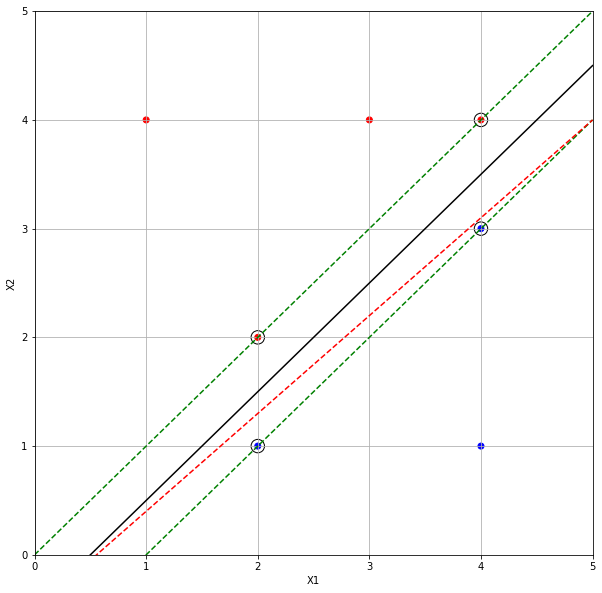

In [15]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

X2 = 0.9*xx - 0.5

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.scatter(X[0], X[1], c=['r', 'r', 'r', 'r', 'b', 'b', 'b'])
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')
plt.plot(xx, X2, 'k--', color='r')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
oj = pd.read_csv("data/OJ.csv")
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(oj.drop(['Purchase'], axis=1),
                                                    oj[['Purchase']], train_size=800)
y_train.values.ravel()

NameError: name 'np' is not defined

In [73]:
df = pd.read_csv('data/OJ.csv')
df.head()


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.0,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.3,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.0,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.0,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.0,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0


In [74]:
# Define predictors and response 
X = df.drop(axis=1, labels=['Purchase'])
y = df['Purchase']
# Dummy variables to transform qualitative into quantitative variables
X = pd.get_dummies(X)


In [78]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=1)
# Fit SVC to data
svc = SVC(C=0.01, kernel='linear', random_state=1)


In [79]:
svc.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))